
# **4-A First Application: Classifying Iris Species**

* This is a small machine learning project for classifying the iris flower and its prediction using four attributes (features)  Sepal length, Sepal width, Petal Length, and Petal width.

* Every iris in the dataset belongs to one of three classes, ('setosa' 'versicolor' 'virginica'),so this problem is a three-class classification problem.

* Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known so that we can predict the species for a new iris.





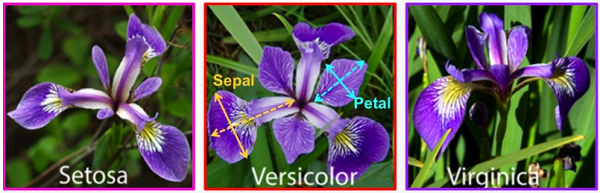



# 1-Data collection

* Dataset is included in scikit-learn in the datasets module. We can load it by calling the load_iris function:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

## Take a look at the data

- The iris object that is returned by load_iris is a **bunch object**, which is very similar to a dictionary. It contains keys and values:

In [ ]:
#It contains keys and values: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
print(iris.keys())

In [ ]:
#The feature names are a list of strings, giving the description of each feature
print(iris['feature_names'])

In [ ]:
#the target names 
print(iris['target_names'])

In [ ]:
#The rows * columns,
print(iris['data'].shape)

In [ ]:
#numpy array: numpy.ndarray
print(type(iris['data']))

In [ ]:
#the feature values for the first five samples:
print(iris['data'][:5])

In [ ]:
#the target values for the first five samples:
print(iris['target'][:5])

In [ ]:
# Convert a NumPy Array to Pandas DataFrame
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_dataframe.head(10))

In [ ]:
X = iris.data
Y = iris.target

#the feature values for the first five samples:
print(X[:5,:]) 
print(Y)

# 2-Data Preparation

## Visualize data

* One of the best ways to inspect data is to visualize it.
* One way to do this is by using a scatter plot. 

In [ ]:
gr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker="o",hist_kwds={'bins': 30}, s=60, alpha=.8)

* From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. 
* This means that a machine learning model will likely be able to learn to separate them.

## Split Dataset 

In [ ]:
#train_test_split: is a function in Sklearn model selection for splitting data arrays into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],train_size=0.75,random_state=42)
print("X_train shape =", X_train.shape)
print("X_test shape=",X_test.shape)
print("y_train shape=",y_train.shape)
print("y_test= shape",y_test.shape)

## 3-Choose a Model:
* There are many classification algorithms in scikit-learn that we could use.
* Here we will use a k nearest neighbors classifier, which is easy to understand.
* The k-NN algorithm is arguably the simplest machine learning algorithm.
* To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

## 4-Train the Model:
* We call the fit method of the knn object,which takes as arguments the numpy array X_train containing the training data and the numpy array y_train of the corresponding training labels:

In [ ]:
knn.fit(X_train, y_train)

## 5-Evaluate the Model:
* We can measure how well the model works by computing the accuracy

In [ ]:
y_pred = knn.predict(X_test)
#We can also use the score method of the knn object, which will compute the test set accuracy for us:
print("accuracy of test set=",knn.score(X_test, y_test))


y_pred = knn.predict(X_train)
print("accuracy of train set=",knn.score(X_train, y_train))

## 6-Parameter Tuning:

* We can improve the accuracy of the model by changing **n_neighbors=4**, we will see  more details in incoming lessons

## 7-Make Predictions:
* Imagine we found an iris in the wild with a 
    * sepal length of 5 cm.
    * sepal width of 2.9 cm.
    * petal length of 1 cm.
    * petal width of 0.2 cm.
    
**What species of iris would this be?**

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])

#To make prediction we call the predict method of the knn object:
prediction = knn.predict(X_new)
print(prediction)
print(iris['target_names'][prediction])

### [**Back to course home**](https://www.kaggle.com/ammarnassanalhajali/machine-learning-in-python-course-1)